In [3]:
!pip install tensorflow

In [75]:
# Q.1-6
import numpy as nup
import pandas as pan
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Reading the dataset from Excel file and preprocessing (normalizing)
df = pan.read_excel("ANN_Dataset.xlsx")
m_values = df[['a', 'b', 'c']]
n_values = df['f']

# normalizing the dataset
scale = MinMaxScaler()
m_scaled = scale.fit_transform(m_values)
n_scaled = scale.fit_transform(n_values.values.reshape(-1,1))

# Splitting the dataset into training, validation and testing
m_train, m_rest, n_train, n_rest = train_test_split(m_scaled, n_scaled, test_size=0.3, random_state=1)
m_valid, m_test, n_valid, n_test = train_test_split(m_rest, n_rest, test_size=0.5, random_state=1)

# Creating the architecture model of the ANN
model0 = Sequential([
    layers.Input(shape=(3,)),
    layers.Dense(80, activation='relu'),
    layers.Dense(40, activation='relu'),
    layers.Dense(1, activation='linear')
])

# Displaying the model summary
model0.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 80)                320       
                                                                 
 dense_31 (Dense)            (None, 40)                3240      
                                                                 
 dense_32 (Dense)            (None, 1)                 41        
                                                                 
Total params: 3601 (14.07 KB)
Trainable params: 3601 (14.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [76]:
# Compiling the ANN model using Adam optimizer and MSE loss function
model0.compile(optimizer='adam', loss='mean_squared_error')
training_history = model0.fit(m_train, n_train, epochs=80, batch_size=32, validation_data=(m_valid, n_valid))

## Evaluating on training data
n_train_predict = model0.predict(m_train)
MSE_train = mean_squared_error(n_train, n_train_predict)
R2_train = r2_score(n_train, n_train_predict)

## Evaluating on test data
n_test_predict = model0.predict(m_test)
MSE_test = mean_squared_error(n_test, n_test_predict)
R2_test = r2_score(n_test, n_test_predict)


Epoch 1/80
74/74 [==============================] - 1s 4ms/step - loss: 0.0236 - val_loss: 0.0192
Epoch 2/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0179 - val_loss: 0.0157
Epoch 3/80
74/74 [==============================] - 0s 3ms/step - loss: 0.0141 - val_loss: 0.0123
Epoch 4/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0114 - val_loss: 0.0097
Epoch 5/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0104 - val_loss: 0.0089
Epoch 6/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0098 - val_loss: 0.0087
Epoch 7/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0092 - val_loss: 0.0087
Epoch 8/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0094 - val_loss: 0.0091
Epoch 9/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0087 - val_loss: 0.0084
Epoch 10/80
74/74 [==============================] - 0s 3ms/step - loss: 0.0085 - val_loss: 0.0085
Epoch 11/80
74/74 [

16/16 [==============================] - 0s 1ms/step


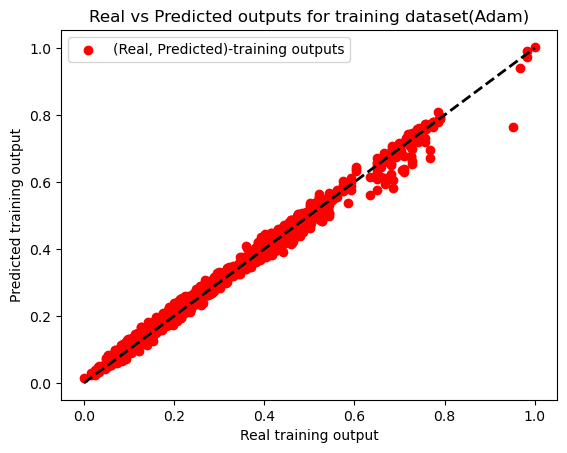

In [77]:
# Plotting and comparing the real and predicted training outputs (Adam optimizer)
plt.scatter(n_train, n_train_predict, c='red', label='(Real, Predicted)-training outputs' )
plt.xlabel('Real training output')
plt.ylabel('Predicted training output')
plt.title('Real vs Predicted outputs for training dataset(Adam)')
plt.legend()
plt.plot([min(n_train), max(n_train)], [min(n_train), max(n_train)], 'k--', lw=2) ## Real value = Predicted output line
plt.savefig('Real vs Predicted outputs for training dataset(Adam)')
plt.show()


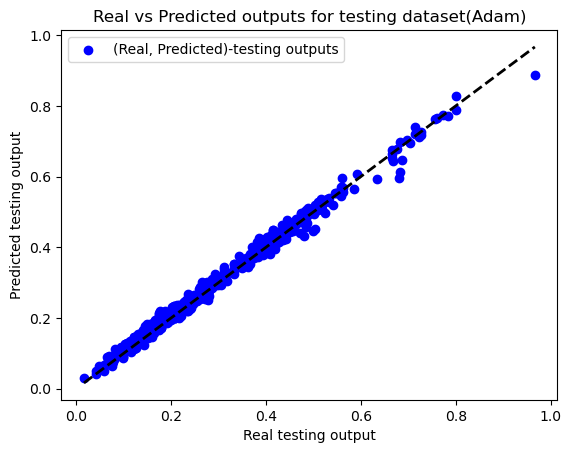

In [78]:
# Plotting the real vs predicted test outputs (Adam optimizer)
plt.scatter(n_test, n_test_predict, c='blue', label='(Real, Predicted)-testing outputs' )
plt.xlabel('Real testing output')
plt.ylabel('Predicted testing output')
plt.title('Real vs Predicted outputs for testing dataset(Adam)')
plt.legend()
plt.plot([min(n_test), max(n_test)], [min(n_test), max(n_test)], 'k--', lw=2) ## Real value = Predicted output line
plt.savefig('Real vs Predicted outputs for testing dataset(Adam)')
plt.show()


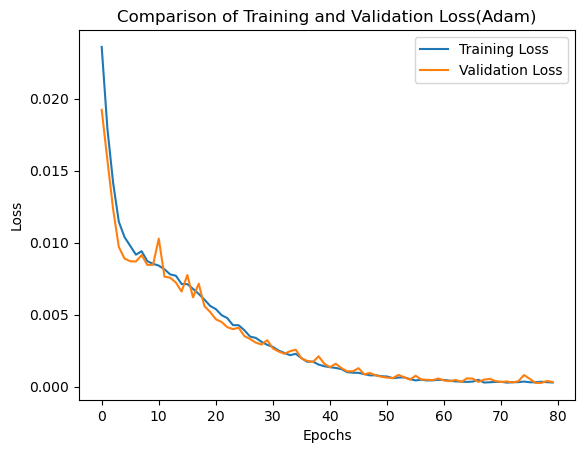

In [79]:
# Comparing the loss function value between training and validation dataset (Adam)
plt.plot(training_history.history['loss'], label='Training Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Comparison of Training and Validation Loss(Adam)')
plt.legend()
plt.savefig('Comparison of Training and Validation Loss(Adam)')
plt.show()


In [80]:
# Modeling the ANN using RMSProp optimizer
model0_RMSprop = Sequential([
    layers.Input(shape=(3,)),
    layers.Dense(80, activation='relu'),
    layers.Dense(40, activation='relu'),
    layers.Dense(1, activation='linear')
])

# Compiling the ANN model using RMSprop optimizer and MSE loss function
model0_RMSprop.compile(optimizer='RMSprop', loss='mean_squared_error')
training_history_RMSprop = model0_RMSprop.fit(m_train, n_train, epochs=80, batch_size=32, validation_data=(m_valid, n_valid))

## Evaluating on training data (with RMSprop optimizer)
n_train_predict_RMSprop = model0_RMSprop.predict(m_train)
MSE_train_RMSprop = mean_squared_error(n_train, n_train_predict_RMSprop)
R2_train_RMSprop = r2_score(n_train, n_train_predict_RMSprop)

## Evaluating on test data (with RMSprop optimizer)
n_test_predict_RMSprop = model0_RMSprop.predict(m_test)
MSE_test_RMSprop = mean_squared_error(n_test, n_test_predict_RMSprop)
R2_test_RMSprop = r2_score(n_test, n_test_predict_RMSprop)


Epoch 1/80
74/74 [==============================] - 1s 3ms/step - loss: 0.0256 - val_loss: 0.0227
Epoch 2/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0207 - val_loss: 0.0203
Epoch 3/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0183 - val_loss: 0.0205
Epoch 4/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0162 - val_loss: 0.0146
Epoch 5/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0141 - val_loss: 0.0136
Epoch 6/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0125 - val_loss: 0.0105
Epoch 7/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0114 - val_loss: 0.0103
Epoch 8/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0105 - val_loss: 0.0094
Epoch 9/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0101 - val_loss: 0.0108
Epoch 10/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0098 - val_loss: 0.0085
Epoch 11/80
74/74 [

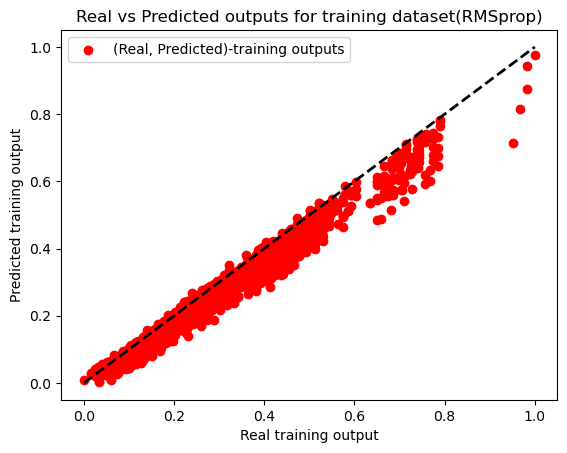

In [81]:
# Comparing the real vs predicted training outputs (RMSprop optimizer)
plt.scatter(n_train, n_train_predict_RMSprop, c='red', label='(Real, Predicted)-training outputs' )
plt.xlabel('Real training output')
plt.ylabel('Predicted training output')
plt.title('Real vs Predicted outputs for training dataset(RMSprop)')
plt.legend()
plt.plot([min(n_train), max(n_train)], [min(n_train), max(n_train)], 'k--', lw=2) ## Real value = Predicted output line
plt.savefig('Real vs Predicted outputs for training dataset(RMSprop)')
plt.show()


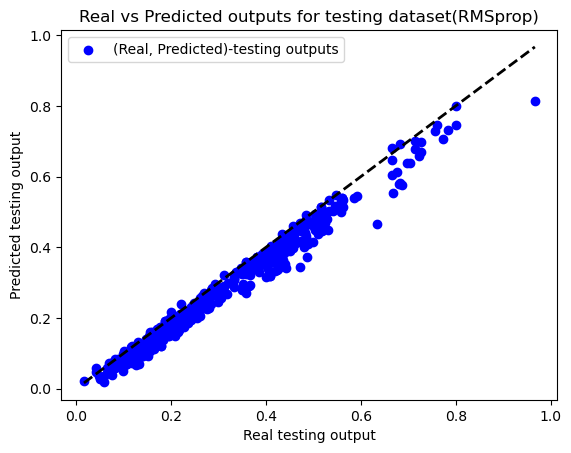

In [82]:
# Comparing the real vs predicted test outputs (RMSprop optimizer)
plt.scatter(n_test, n_test_predict_RMSprop, c='blue', label='(Real, Predicted)-testing outputs' )
plt.xlabel('Real testing output')
plt.ylabel('Predicted testing output')
plt.title('Real vs Predicted outputs for testing dataset(RMSprop)')
plt.legend()
plt.plot([min(n_test), max(n_test)], [min(n_test), max(n_test)], 'k--', lw=2) ## Real value = Predicted output line
plt.savefig('Real vs Predicted outputs for testing dataset(RMSprop)')
plt.show()


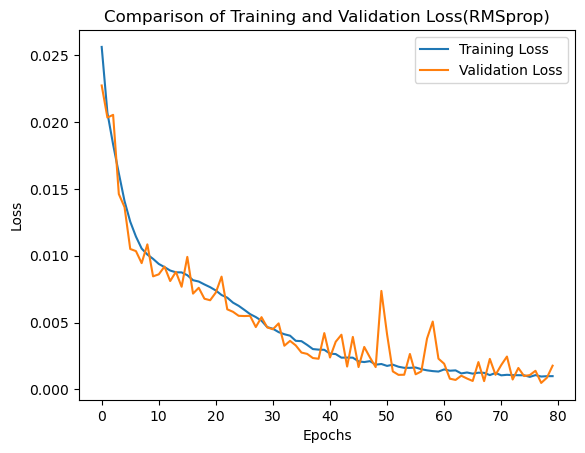

In [83]:
# Comparing the loss function value between training and validation dataset (RMSprop)
plt.plot(training_history_RMSprop.history['loss'], label='Training Loss')
plt.plot(training_history_RMSprop.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Comparison of Training and Validation Loss(RMSprop)')
plt.legend()
plt.savefig('Comparison of Training and Validation Loss(RMSprop)')
plt.show()


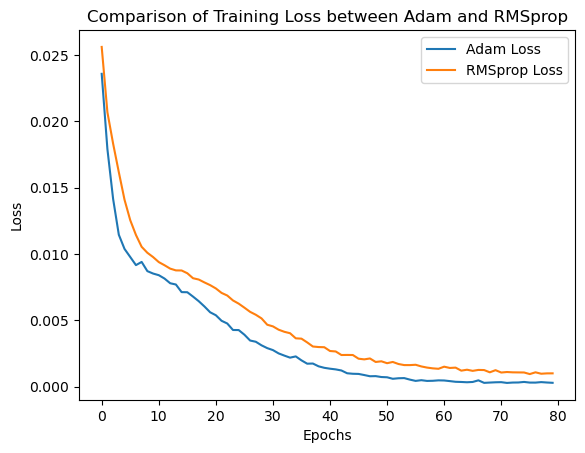

In [84]:
# Plotting and comparing the metric value of Adam and RMSprop optimizer
plt.plot(training_history.history['loss'], label='Adam Loss')
plt.plot(training_history_RMSprop.history['loss'], label='RMSprop Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Comparison of Training Loss between Adam and RMSprop')
plt.legend()
plt.savefig('Comparison of Training Loss between Adam and RMSprop')
plt.show()


In [85]:
# Metrics Results
print ("Mean Squared Error for training dataset (Adam):", MSE_train)
print ("R² error for training dataset (Adam):", R2_train)
print ("Mean Squared Error for testing dataset (Adam):", MSE_test)
print ("R² error for testing dataset (Adam):", R2_test)
print ("Mean Squared Error for training dataset (RMSprop):", MSE_train_RMSprop)
print ("R² error for training dataset (RMSprop):", R2_train_RMSprop)
print ("Mean Squared Error for testing dataset (RMSprop):", MSE_test_RMSprop)
print ("R² error for testing dataset (RMSprop):", R2_test_RMSprop)

Mean Squared Error for training dataset (Adam): 0.00025991526293064887
R² error for training dataset (Adam): 0.9906417295172101
Mean Squared Error for testing dataset (Adam): 0.0002614743134920795
R² error for testing dataset (Adam): 0.9904382957187693
Mean Squared Error for training dataset (RMSprop): 0.001688093267178351
R² error for training dataset (RMSprop): 0.9392200626607806
Mean Squared Error for testing dataset (RMSprop): 0.0014500633512191294
R² error for testing dataset (RMSprop): 0.946973464550935


# Question 7) Variation of parameters

Epoch 1/80
74/74 [==============================] - 1s 4ms/step - loss: 0.0296 - val_loss: 0.0217
Epoch 2/80
74/74 [==============================] - 0s 3ms/step - loss: 0.0195 - val_loss: 0.0170
Epoch 3/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0156 - val_loss: 0.0131
Epoch 4/80
74/74 [==============================] - 0s 3ms/step - loss: 0.0125 - val_loss: 0.0105
Epoch 5/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0107 - val_loss: 0.0089
Epoch 6/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0099 - val_loss: 0.0086
Epoch 7/80
74/74 [==============================] - 0s 3ms/step - loss: 0.0093 - val_loss: 0.0087
Epoch 8/80
74/74 [==============================] - 0s 3ms/step - loss: 0.0091 - val_loss: 0.0084
Epoch 9/80
74/74 [==============================] - 0s 3ms/step - loss: 0.0086 - val_loss: 0.0078
Epoch 10/80
74/74 [==============================] - 0s 3ms/step - loss: 0.0089 - val_loss: 0.0075
Epoch 11/80
74/74 [

Epoch 80/80
16/16 [==============================] - 0s 2ms/step


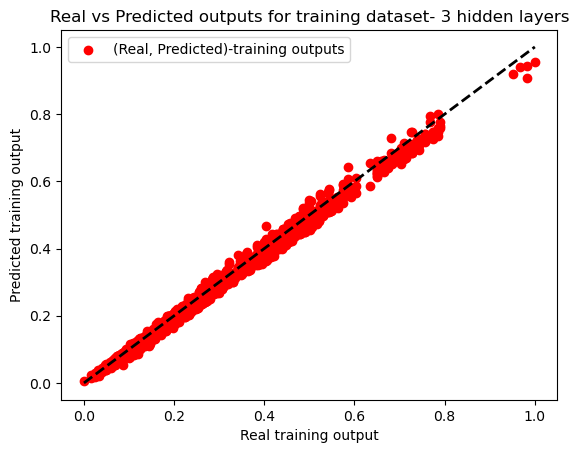

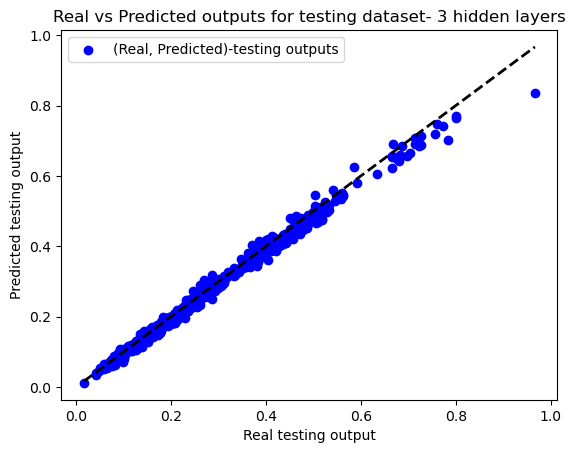

Epoch 1/80
74/74 [==============================] - 1s 4ms/step - loss: 0.0294 - val_loss: 0.0178
Epoch 2/80
74/74 [==============================] - 0s 3ms/step - loss: 0.0150 - val_loss: 0.0106
Epoch 3/80
74/74 [==============================] - 0s 3ms/step - loss: 0.0113 - val_loss: 0.0100
Epoch 4/80
74/74 [==============================] - 0s 3ms/step - loss: 0.0101 - val_loss: 0.0110
Epoch 5/80
74/74 [==============================] - 0s 3ms/step - loss: 0.0097 - val_loss: 0.0082
Epoch 6/80
74/74 [==============================] - 0s 3ms/step - loss: 0.0090 - val_loss: 0.0078
Epoch 7/80
74/74 [==============================] - 0s 3ms/step - loss: 0.0088 - val_loss: 0.0076
Epoch 8/80
74/74 [==============================] - 0s 3ms/step - loss: 0.0080 - val_loss: 0.0066
Epoch 9/80
74/74 [==============================] - 0s 3ms/step - loss: 0.0067 - val_loss: 0.0055
Epoch 10/80
74/74 [==============================] - 0s 3ms/step - loss: 0.0062 - val_loss: 0.0054
Epoch 11/80
74/74 [

74/74 [==============================] - 0s 3ms/step - loss: 3.1781e-04 - val_loss: 5.4510e-04
Epoch 80/80
16/16 [==============================] - 0s 2ms/step


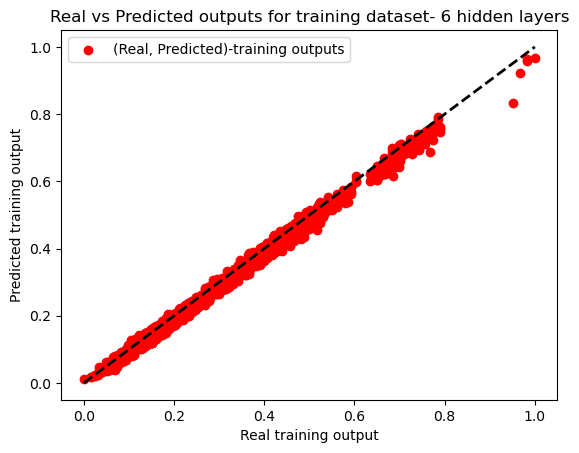

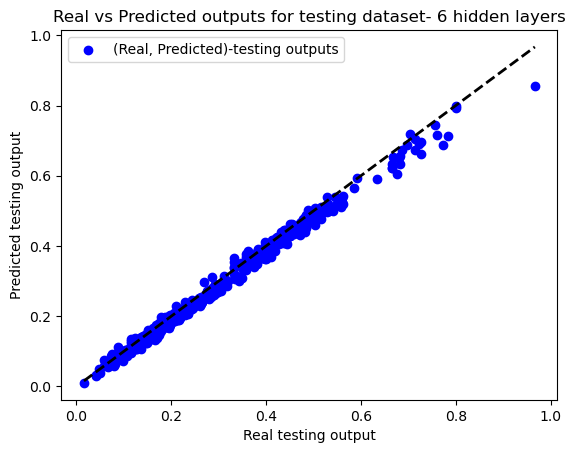

Epoch 1/80
74/74 [==============================] - 2s 5ms/step - loss: 0.0310 - val_loss: 0.0219
Epoch 2/80
74/74 [==============================] - 0s 3ms/step - loss: 0.0177 - val_loss: 0.0149
Epoch 3/80
74/74 [==============================] - 0s 3ms/step - loss: 0.0119 - val_loss: 0.0110
Epoch 4/80
74/74 [==============================] - 0s 3ms/step - loss: 0.0098 - val_loss: 0.0087
Epoch 5/80
74/74 [==============================] - 0s 3ms/step - loss: 0.0096 - val_loss: 0.0080
Epoch 6/80
74/74 [==============================] - 0s 3ms/step - loss: 0.0082 - val_loss: 0.0087
Epoch 7/80
74/74 [==============================] - 0s 3ms/step - loss: 0.0080 - val_loss: 0.0078
Epoch 8/80
74/74 [==============================] - 0s 3ms/step - loss: 0.0057 - val_loss: 0.0050
Epoch 9/80
74/74 [==============================] - 0s 3ms/step - loss: 0.0038 - val_loss: 0.0025
Epoch 10/80
74/74 [==============================] - 0s 3ms/step - loss: 0.0029 - val_loss: 0.0054
Epoch 11/80
74/74 [

74/74 [==============================] - 0s 3ms/step - loss: 2.6330e-04 - val_loss: 8.2886e-04
Epoch 80/80
16/16 [==============================] - 0s 2ms/step


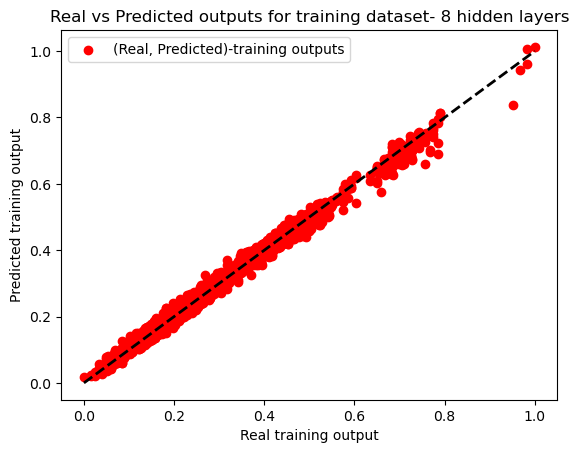

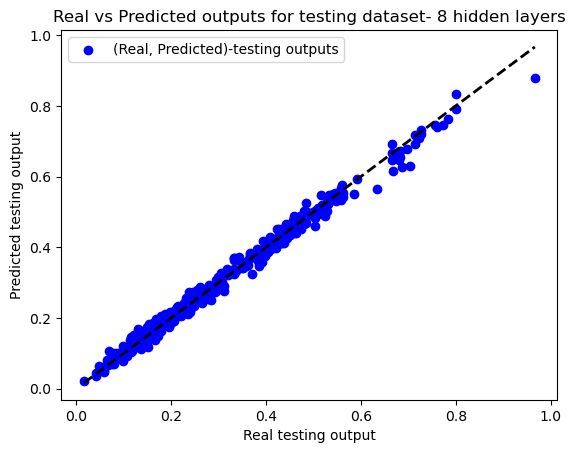

No. of Hidden Layers- 3
MSE for training data- 0.00024554032547923713
R2 for training data- 0.9911593003259678
MSE for testing data- 0.00029924269333159674
R2 for testing data- 0.9890571654869555
No. of Hidden Layers- 6
MSE for training data- 0.0002731914884597556
R2 for training data- 0.99016371792185
MSE for testing data- 0.00035939781611212624
R2 for testing data- 0.9868573872856219
No. of Hidden Layers- 8
MSE for training data- 0.00023244530766015117
R2 for training data- 0.9916307875227803
MSE for testing data- 0.00024404761835454978
R2 for testing data- 0.9910755625434865


In [99]:
# 1. Variation in number of hidden layers
# Creating lists to store metric values
MSE_train_layer_result = []
R2_train_layer_result = []
MSE_test_layer_result = []
R2_test_layer_result = []

# Defining the number of hidden layers in three variations
Hidden_layers = [3, 6, 8]

# Creating the model-Model1
for i in Hidden_layers:
    model1 = Sequential()
    model1.add(layers.Input(shape=(3,)))
    for j in range(i):          
        model1.add(layers.Dense(50, activation='relu'))
    
    model1.add(layers.Dense(1, activation='linear'))
    
    model1.compile(optimizer='adam', loss='mean_squared_error')
    training_history_layers = model1.fit(m_train, n_train, epochs=80, batch_size=32, validation_data=(m_valid, n_valid))
    
    ## Evaluating on training data
    n_train_predict_layers = model1.predict(m_train)
    MSE_train_layers = mean_squared_error(n_train, n_train_predict_layers)
    R2_train_layers = r2_score(n_train, n_train_predict_layers)
    
    ## Evaluating on test data
    n_test_predict_layers = model1.predict(m_test)
    MSE_test_layers = mean_squared_error(n_test, n_test_predict_layers)
    R2_test_layers = r2_score(n_test, n_test_predict_layers)
               
    ## Append the metric values to the lists
    MSE_train_layer_result.append(MSE_train_layers)
    R2_train_layer_result.append(R2_train_layers)
    MSE_test_layer_result.append(MSE_test_layers)
    R2_test_layer_result.append(R2_test_layers)
    
    ## Plotting and comparing the real vs predicted training outputs
    plt.scatter(n_train, n_train_predict_layers, c='red', label='(Real, Predicted)-training outputs' )
    plt.xlabel('Real training output')
    plt.ylabel('Predicted training output')
    plt.title(f"Real vs Predicted outputs for training dataset- {i} hidden layers")
    plt.legend()
    plt.plot([min(n_train), max(n_train)], [min(n_train), max(n_train)], 'k--', lw=2) ## Real value = Predicted output line
    plt.savefig(f"Real vs Predicted outputs for training dataset- {i} hidden layers")
    plt.show()

    
    ## Plotting and comparing the real vs predicted test outputs
    plt.scatter(n_test, n_test_predict_layers, c='blue', label='(Real, Predicted)-testing outputs' )
    plt.xlabel('Real testing output')
    plt.ylabel('Predicted testing output')
    plt.title(f"Real vs Predicted outputs for testing dataset- {i} hidden layers")
    plt.legend()
    plt.plot([min(n_test), max(n_test)], [min(n_test), max(n_test)], 'k--', lw=2) ## Real value = Predicted output line
    plt.savefig(f"Real vs Predicted outputs for testing dataset- {i} hidden layers")
    plt.show()

# Displaying the metric results
for k, i in enumerate(Hidden_layers):
    print(f"No. of Hidden Layers- {i}")
    print(f"MSE for training data- {MSE_train_layer_result[k]}")
    print(f"R2 for training data- {R2_train_layer_result[k]}")
    print(f"MSE for testing data- {MSE_test_layer_result[k]}")
    print(f"R2 for testing data- {R2_test_layer_result[k]}")

               

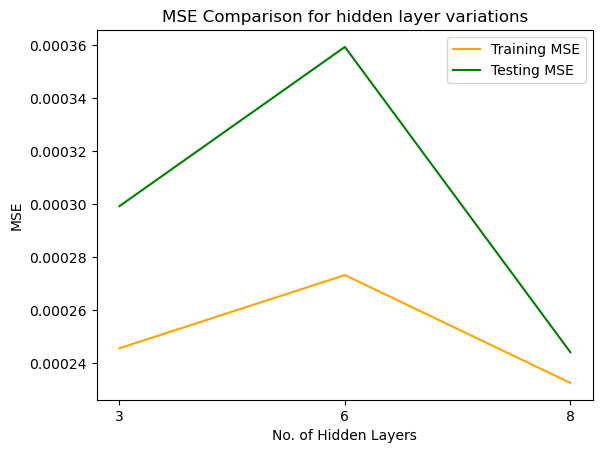

In [100]:
# Plotting MSE Comparison for hidden layer variations for training and testing data
hidden_layer_config = ["3", "6", "8"]
plt.figure()
plt.plot(hidden_layer_config, MSE_train_layer_result, label='Training MSE', c='Orange')
plt.plot(hidden_layer_config, MSE_test_layer_result, label='Testing MSE', c='Green')
plt.xlabel('No. of Hidden Layers')
plt.ylabel('MSE')
plt.title('MSE Comparison for hidden layer variations')
plt.legend()
plt.savefig('MSE Comparison for hidden layer variations')
plt.show()

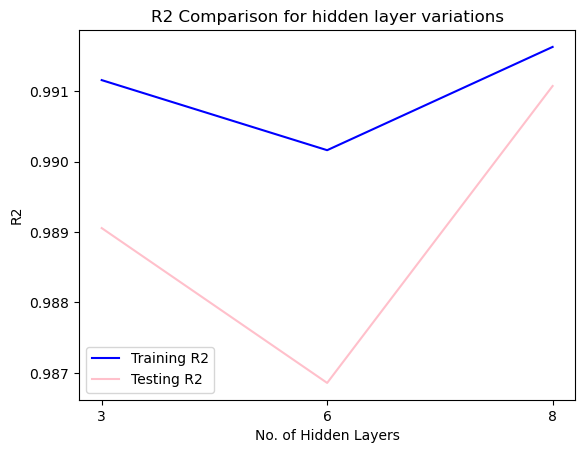

In [101]:
# Plotting R2 Comparison for hidden layer variations for training and testing data
plt.figure()
plt.plot(hidden_layer_config, R2_train_layer_result, label='Training R2', c='Blue')
plt.plot(hidden_layer_config, R2_test_layer_result, label='Testing R2', c='Pink')
plt.xlabel('No. of Hidden Layers')
plt.ylabel('R2')
plt.title('R2 Comparison for hidden layer variations')
plt.legend()
plt.savefig('R2 Comparison for hidden layer variations')
plt.show()

Epoch 1/80
74/74 [==============================] - 1s 4ms/step - loss: 0.0461 - val_loss: 0.0232
Epoch 2/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0222 - val_loss: 0.0208
Epoch 3/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0204 - val_loss: 0.0192
Epoch 4/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0189 - val_loss: 0.0177
Epoch 5/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0177 - val_loss: 0.0163
Epoch 6/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0164 - val_loss: 0.0149
Epoch 7/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0147 - val_loss: 0.0135
Epoch 8/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0131 - val_loss: 0.0118
Epoch 9/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0120 - val_loss: 0.0111
Epoch 10/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0111 - val_loss: 0.0101
Epoch 11/80
74/74 [

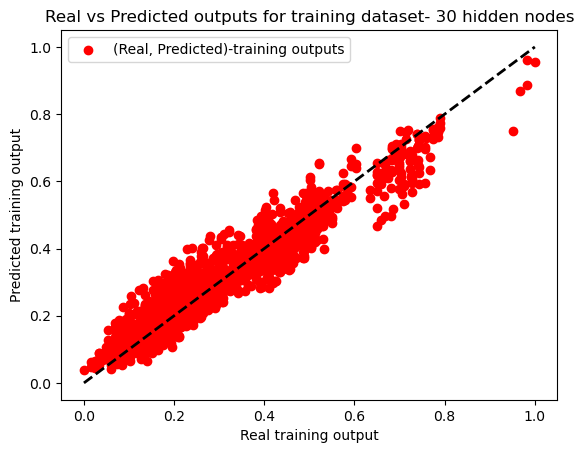

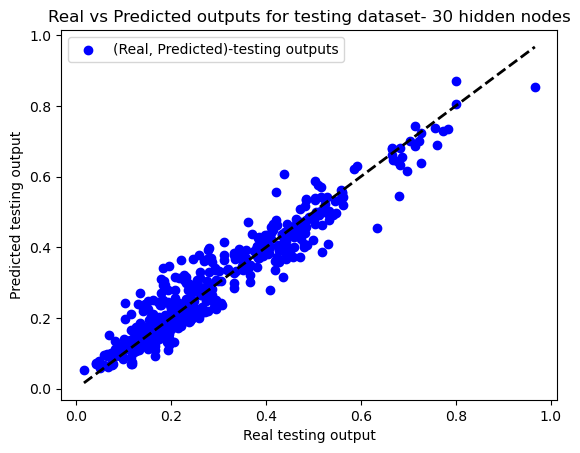

Epoch 1/80
74/74 [==============================] - 1s 3ms/step - loss: 0.0298 - val_loss: 0.0255
Epoch 2/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0237 - val_loss: 0.0229
Epoch 3/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0214 - val_loss: 0.0204
Epoch 4/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0202 - val_loss: 0.0197
Epoch 5/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0184 - val_loss: 0.0186
Epoch 6/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0169 - val_loss: 0.0164
Epoch 7/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0155 - val_loss: 0.0155
Epoch 8/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0142 - val_loss: 0.0138
Epoch 9/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0131 - val_loss: 0.0119
Epoch 10/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0124 - val_loss: 0.0120
Epoch 11/80
74/74 [

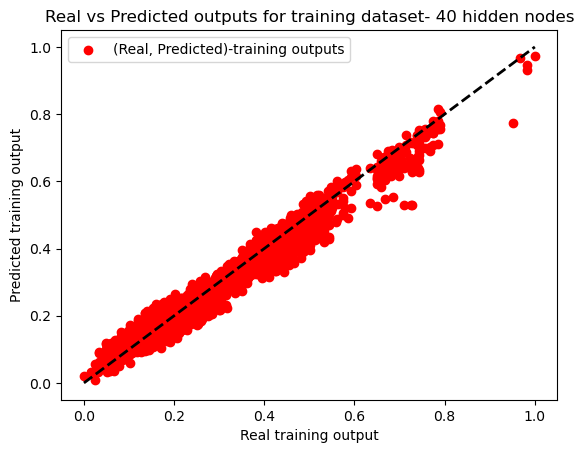

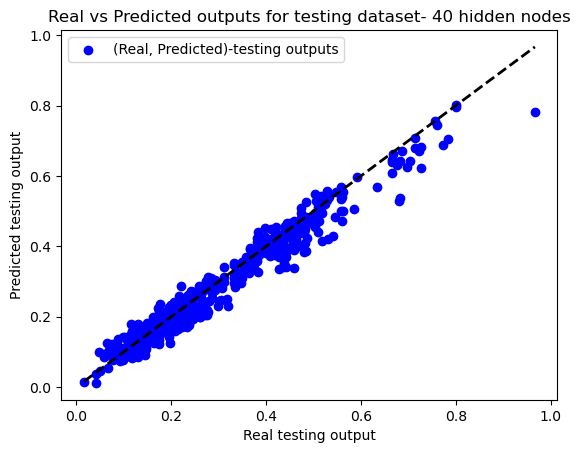

Epoch 1/80
74/74 [==============================] - 1s 3ms/step - loss: 0.0392 - val_loss: 0.0216
Epoch 2/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0199 - val_loss: 0.0176
Epoch 3/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0173 - val_loss: 0.0153
Epoch 4/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0151 - val_loss: 0.0134
Epoch 5/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0132 - val_loss: 0.0116
Epoch 6/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0119 - val_loss: 0.0110
Epoch 7/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0112 - val_loss: 0.0115
Epoch 8/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0104 - val_loss: 0.0094
Epoch 9/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0099 - val_loss: 0.0086
Epoch 10/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0093 - val_loss: 0.0086
Epoch 11/80
74/74 [

16/16 [==============================] - 0s 1ms/step


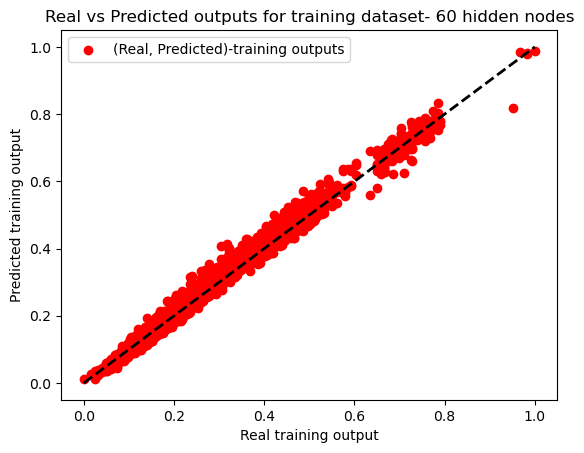

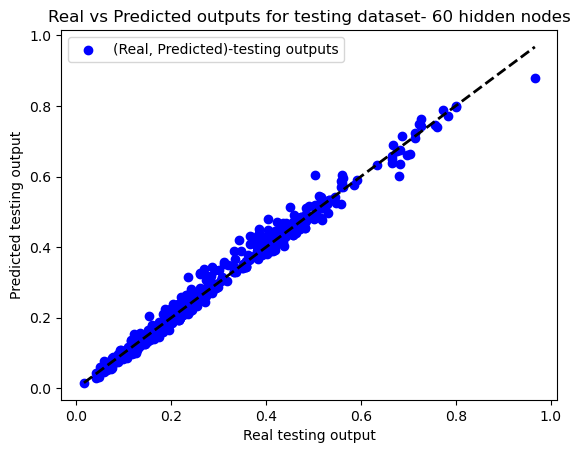

No. of Hidden Nodes- 30
MSE for training data- 0.002169944271854128
R2 for training data- 0.9218709774884982
MSE for testing data- 0.0021973561337324736
R2 for testing data- 0.919646143169108
No. of Hidden Nodes- 40
MSE for training data- 0.0012094972058956422
R2 for training data- 0.9564519533276882
MSE for testing data- 0.001296008047778851
R2 for testing data- 0.9526070246309993
No. of Hidden Nodes- 60
MSE for training data- 0.0003870467143374637
R2 for training data- 0.9860643511219594
MSE for testing data- 0.0004180593934411572
R2 for testing data- 0.9847122256917366


In [103]:
# 2. Variations in number of hidden nodes
# Creating lists to store metric values
MSE_train_node_result = []
R2_train_node_result = []
MSE_test_node_result = []
R2_test_node_result = []

# Defining the number of hidden nodes in three variations
Hidden_nodes = [30, 40, 60]

# Creating the model-Model2
for p in Hidden_nodes:
    model2 = Sequential()
    model2.add(layers.Input(shape=(3,))) 
    ## add hidden layers with the current number of nodes
    model2.add(layers.Dense(p, activation='relu'))
    model2.add(layers.Dense(p // 2, activation='relu')) ## adjusting the number of hidden nodes
    model2.add(layers.Dense(1, activation='linear')) 
    
    model2.compile(optimizer='adam', loss='mean_squared_error')
    training_history_nodes = model2.fit(m_train, n_train, epochs=80, batch_size=32, validation_data=(m_valid, n_valid))
    
    ## Evaluating on training data
    n_train_predict_nodes = model2.predict(m_train)
    MSE_train_nodes = mean_squared_error(n_train, n_train_predict_nodes)
    R2_train_nodes = r2_score(n_train, n_train_predict_nodes)
    
    ## Evaluating on test data
    n_test_predict_nodes = model2.predict(m_test)
    MSE_test_nodes = mean_squared_error(n_test, n_test_predict_nodes)
    R2_test_nodes = r2_score(n_test, n_test_predict_nodes)
               
    ## Append the metric values to the lists
    MSE_train_node_result.append(MSE_train_nodes)
    R2_train_node_result.append(R2_train_nodes)
    MSE_test_node_result.append(MSE_test_nodes)
    R2_test_node_result.append(R2_test_nodes)
    
    ## Plotting and comparing the real vs predicted training outputs
    plt.scatter(n_train, n_train_predict_nodes, c='red', label='(Real, Predicted)-training outputs')
    plt.xlabel('Real training output')
    plt.ylabel('Predicted training output')
    plt.title(f"Real vs Predicted outputs for training dataset- {p} hidden nodes")
    plt.legend()
    plt.plot([min(n_train), max(n_train)], [min(n_train), max(n_train)], 'k--', lw=2) ## Real value = Predicted output line
    plt.savefig(f"Real vs Predicted outputs for training dataset- {p} hidden nodes")
    plt.show()

    
    ## Plotting and comparing the real vs predicted test outputs
    plt.scatter(n_test, n_test_predict_nodes, c='blue', label='(Real, Predicted)-testing outputs')
    plt.xlabel('Real testing output')
    plt.ylabel('Predicted testing output')
    plt.title(f"Real vs Predicted outputs for testing dataset- {p} hidden nodes")
    plt.legend()
    plt.plot([min(n_test), max(n_test)], [min(n_test), max(n_test)], 'k--', lw=2) ## Real value = Predicted output line
    plt.savefig(f"Real vs Predicted outputs for testing dataset- {p} hidden nodes")
    plt.show()

# Displaying the metric results
for h, p in enumerate(Hidden_nodes):
    print(f"No. of Hidden Nodes- {p}")
    print(f"MSE for training data- {MSE_train_node_result[h]}")
    print(f"R2 for training data- {R2_train_node_result[h]}")
    print(f"MSE for testing data- {MSE_test_node_result[h]}")
    print(f"R2 for testing data- {R2_test_node_result[h]}")

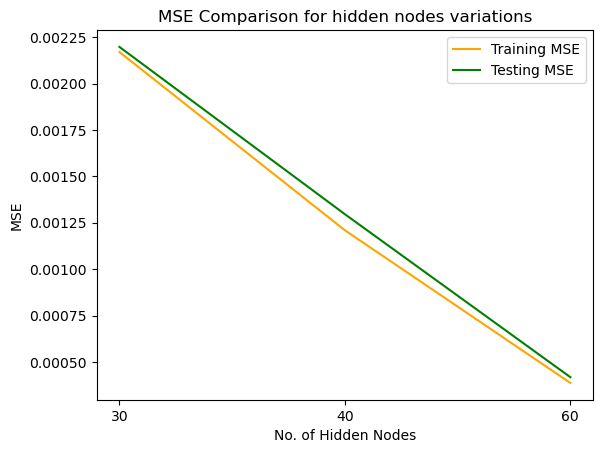

In [104]:
# Plotting MSE Comparison for hidden nodes variations for training and testing data
hidden_node_config = ["30", "40", "60"]
plt.figure()
plt.plot(hidden_node_config, MSE_train_node_result, label='Training MSE', c='Orange')
plt.plot(hidden_node_config, MSE_test_node_result, label='Testing MSE', c='Green')
plt.xlabel('No. of Hidden Nodes')
plt.ylabel('MSE')
plt.title('MSE Comparison for hidden nodes variations')
plt.legend()
plt.savefig('MSE Comparison for hidden nodes variations')
plt.show()

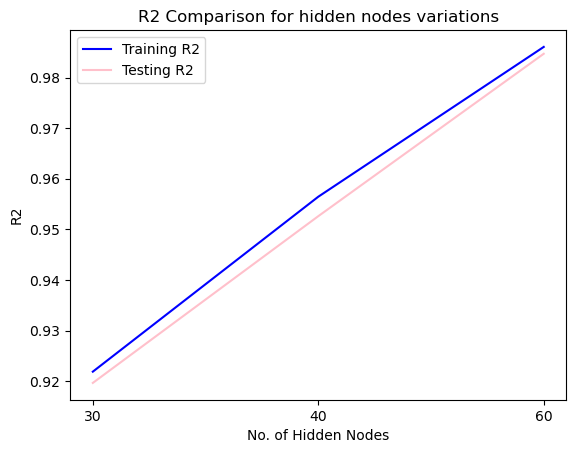

In [105]:
# Plotting R2 Comparison for hidden nodes variations for training and testing data
plt.figure()
plt.plot(hidden_node_config, R2_train_node_result, label='Training R2', c='Blue')
plt.plot(hidden_node_config, R2_test_node_result, label='Testing R2', c='Pink')
plt.xlabel('No. of Hidden Nodes')
plt.ylabel('R2')
plt.title('R2 Comparison for hidden nodes variations')
plt.legend()
plt.savefig('R2 Comparison for hidden nodes variations')
plt.show()

Epoch 1/80
74/74 [==============================] - 1s 3ms/step - loss: 0.0549 - val_loss: 0.0237
Epoch 2/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0219 - val_loss: 0.0202
Epoch 3/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0196 - val_loss: 0.0178
Epoch 4/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0178 - val_loss: 0.0166
Epoch 5/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0160 - val_loss: 0.0147
Epoch 6/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0144 - val_loss: 0.0132
Epoch 7/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0129 - val_loss: 0.0123
Epoch 8/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0120 - val_loss: 0.0109
Epoch 9/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0109 - val_loss: 0.0103
Epoch 10/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0105 - val_loss: 0.0099
Epoch 11/80
74/74 [

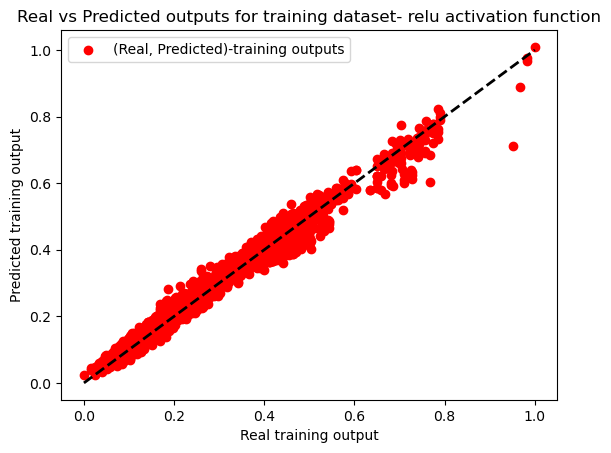

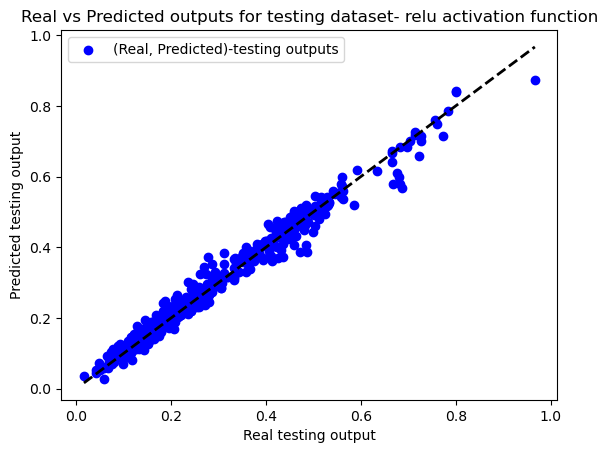

Epoch 1/80
74/74 [==============================] - 1s 3ms/step - loss: 0.0408 - val_loss: 0.0287
Epoch 2/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0285 - val_loss: 0.0302
Epoch 3/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0284 - val_loss: 0.0287
Epoch 4/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0279 - val_loss: 0.0289
Epoch 5/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0279 - val_loss: 0.0289
Epoch 6/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0278 - val_loss: 0.0303
Epoch 7/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0276 - val_loss: 0.0303
Epoch 8/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0268 - val_loss: 0.0291
Epoch 9/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0268 - val_loss: 0.0261
Epoch 10/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0261 - val_loss: 0.0257
Epoch 11/80
74/74 [

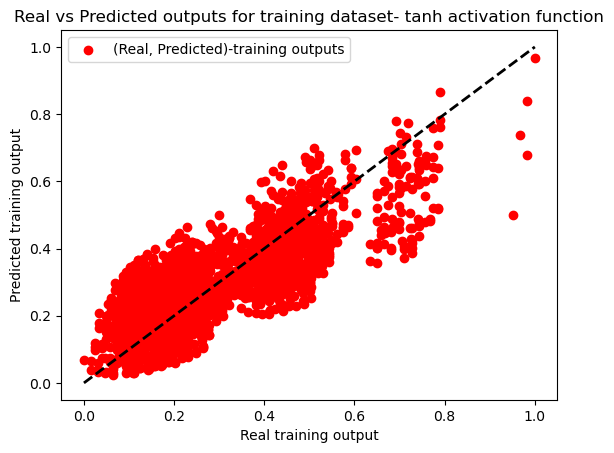

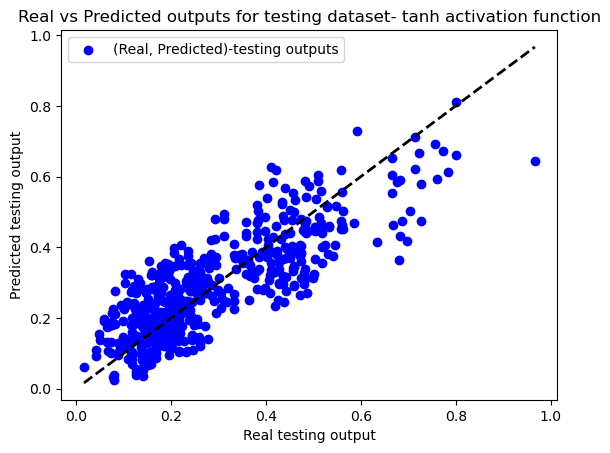

Epoch 1/80
74/74 [==============================] - 1s 3ms/step - loss: 0.0470 - val_loss: 0.0288
Epoch 2/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0282 - val_loss: 0.0287
Epoch 3/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0280 - val_loss: 0.0288
Epoch 4/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0281 - val_loss: 0.0286
Epoch 5/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0281 - val_loss: 0.0288
Epoch 6/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0280 - val_loss: 0.0291
Epoch 7/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0284 - val_loss: 0.0285
Epoch 8/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0280 - val_loss: 0.0286
Epoch 9/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0281 - val_loss: 0.0285
Epoch 10/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0282 - val_loss: 0.0290
Epoch 11/80
74/74 [

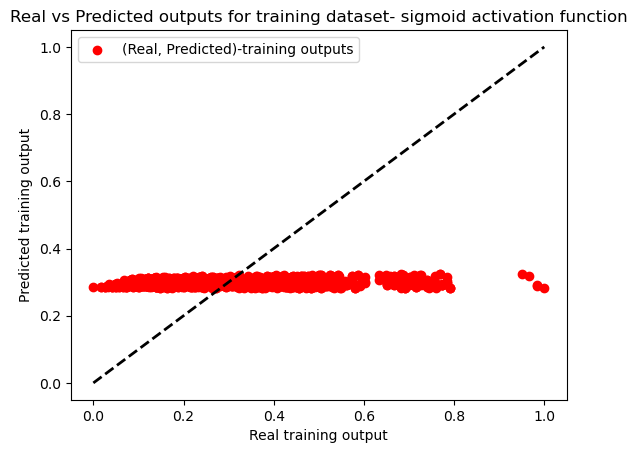

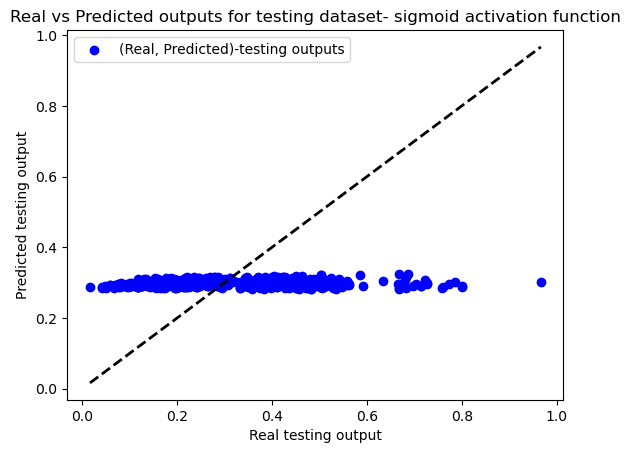

Activation functions- relu
MSE for training data- 0.000636133502782318
R2 for training data- 0.9770959607562948
MSE for testing data- 0.0006457394959175149
R2 for testing data- 0.976386322540775
Activation functions- tanh
MSE for training data- 0.010709911388912152
R2 for training data- 0.6143887569584751
MSE for testing data- 0.009244198412769977
R2 for testing data- 0.6619542074345814
Activation functions- sigmoid
MSE for training data- 0.027464836290286978
R2 for training data- 0.011126303734498855
MSE for testing data- 0.02726768639446139
R2 for testing data- 0.0028636073077389357


In [110]:
# 3. Variations in activation functions
# Creating lists to store metric values
MSE_train_af_result = []
R2_train_af_result = []
MSE_test_af_result = []
R2_test_af_result = []

# Defining the number of activation functions in three variations
Activation_functions = ['relu', 'tanh', 'sigmoid']

# Creating the model-Model3
for q in Activation_functions:
    model3 = Sequential()
    model3.add(layers.Input(shape=(3,))) 
    ## add hidden layers
    model3.add(layers.Dense(50, activation=q))
    model3.add(layers.Dense(30, activation=q)) ## adjusting the number of hidden nodes
    model3.add(layers.Dense(1, activation='linear')) 
    
    model3.compile(optimizer='adam', loss='mean_squared_error')
    training_history_af = model3.fit(m_train, n_train, epochs=80, batch_size=32, validation_data=(m_valid, n_valid))
    
    ## Evaluating on training data
    n_train_predict_af = model3.predict(m_train)
    MSE_train_af = mean_squared_error(n_train, n_train_predict_af)
    R2_train_af = r2_score(n_train, n_train_predict_af)
    
    ## Evaluating on test data
    n_test_predict_af = model3.predict(m_test)
    MSE_test_af = mean_squared_error(n_test, n_test_predict_af)
    R2_test_af = r2_score(n_test, n_test_predict_af)
               
    ## Append the metric values to the lists
    MSE_train_af_result.append(MSE_train_af)
    R2_train_af_result.append(R2_train_af)
    MSE_test_af_result.append(MSE_test_af)
    R2_test_af_result.append(R2_test_af)
    
    ## Plotting and comparing the real vs predicted training outputs
    plt.scatter(n_train, n_train_predict_af, c='red', label='(Real, Predicted)-training outputs')
    plt.xlabel('Real training output')
    plt.ylabel('Predicted training output')
    plt.title(f"Real vs Predicted outputs for training dataset- {q} activation function")
    plt.legend()
    plt.plot([min(n_train), max(n_train)], [min(n_train), max(n_train)], 'k--', lw=2) ## Real value = Predicted output line
    plt.savefig(f"Real vs Predicted outputs for training dataset- {q} activation function")
    plt.show()

    
    ## Plotting and comparing the real vs predicted test outputs
    plt.scatter(n_test, n_test_predict_af, c='blue', label='(Real, Predicted)-testing outputs')
    plt.xlabel('Real testing output')
    plt.ylabel('Predicted testing output')
    plt.title(f"Real vs Predicted outputs for testing dataset- {q} activation function")
    plt.legend()
    plt.plot([min(n_test), max(n_test)], [min(n_test), max(n_test)], 'k--', lw=2) ## Real value = Predicted output line
    plt.savefig(f"Real vs Predicted outputs for testing dataset- {q} activation function")
    plt.show()

# Displaying the metric results
for g, q in enumerate(Activation_functions):
    print(f"Activation functions- {q}")
    print(f"MSE for training data- {MSE_train_af_result[g]}")
    print(f"R2 for training data- {R2_train_af_result[g]}")
    print(f"MSE for testing data- {MSE_test_af_result[g]}")
    print(f"R2 for testing data- {R2_test_af_result[g]}")

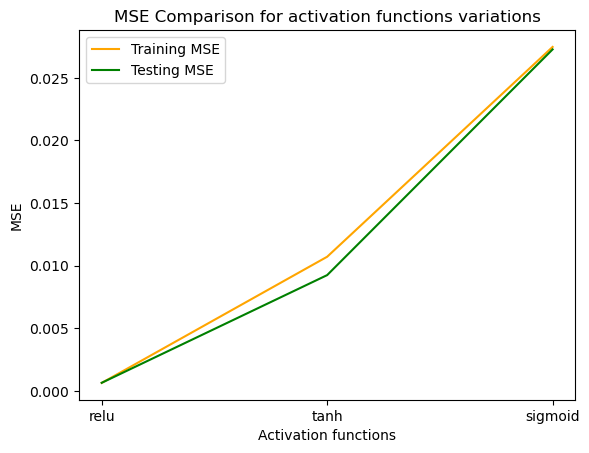

In [111]:
# Plotting MSE Comparison for activation functions variations for training and testing data
af_config = ["relu", "tanh", "sigmoid"]
plt.figure()
plt.plot(af_config, MSE_train_af_result, label='Training MSE', c='Orange')
plt.plot(af_config, MSE_test_af_result, label='Testing MSE', c='Green')
plt.xlabel('Activation functions')
plt.ylabel('MSE')
plt.title('MSE Comparison for activation functions variations')
plt.legend()
plt.savefig('MSE Comparison for activation functions variations')
plt.show()

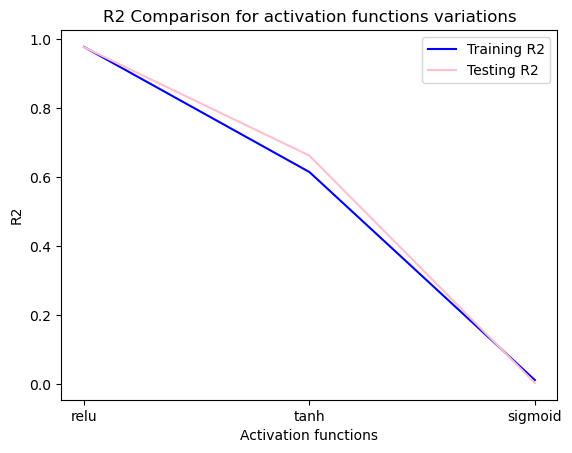

In [112]:
# Plotting R2 Comparison for activation functions variations for training and testing data
plt.figure()
plt.plot(af_config, R2_train_af_result, label='Training R2', c='Blue')
plt.plot(af_config, R2_test_af_result, label='Testing R2', c='Pink')
plt.xlabel('Activation functions')
plt.ylabel('R2')
plt.title('R2 Comparison for activation functions variations')
plt.legend()
plt.savefig('R2 Comparison for activation functions variations')
plt.show()

Epoch 1/50
74/74 [==============================] - 1s 4ms/step - loss: 0.0286 - val_loss: 0.0218
Epoch 2/50
74/74 [==============================] - 0s 2ms/step - loss: 0.0196 - val_loss: 0.0186
Epoch 3/50
74/74 [==============================] - 0s 3ms/step - loss: 0.0167 - val_loss: 0.0148
Epoch 4/50
74/74 [==============================] - 0s 3ms/step - loss: 0.0141 - val_loss: 0.0128
Epoch 5/50
74/74 [==============================] - 0s 2ms/step - loss: 0.0124 - val_loss: 0.0111
Epoch 6/50
74/74 [==============================] - 0s 3ms/step - loss: 0.0110 - val_loss: 0.0099
Epoch 7/50
74/74 [==============================] - 0s 2ms/step - loss: 0.0104 - val_loss: 0.0093
Epoch 8/50
74/74 [==============================] - 0s 2ms/step - loss: 0.0098 - val_loss: 0.0088
Epoch 9/50
74/74 [==============================] - 0s 2ms/step - loss: 0.0093 - val_loss: 0.0087
Epoch 10/50
74/74 [==============================] - 0s 2ms/step - loss: 0.0093 - val_loss: 0.0086
Epoch 11/50
74/74 [

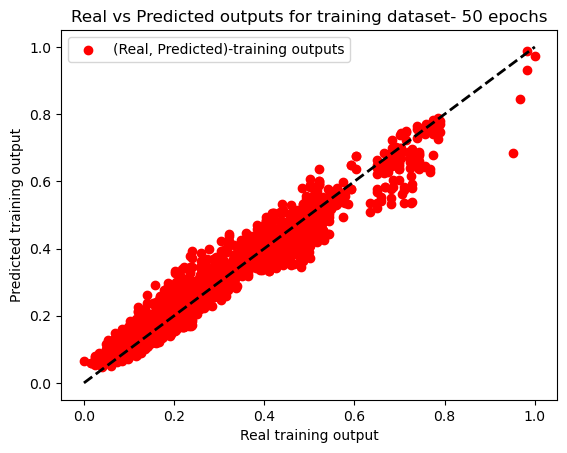

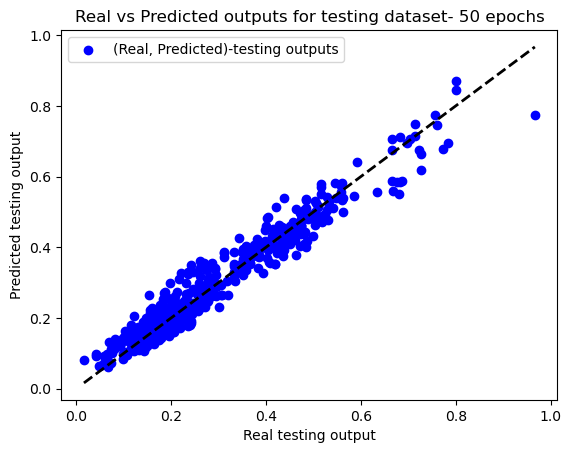

Epoch 1/100
74/74 [==============================] - 1s 3ms/step - loss: 0.0271 - val_loss: 0.0217
Epoch 2/100
74/74 [==============================] - 0s 2ms/step - loss: 0.0205 - val_loss: 0.0185
Epoch 3/100
74/74 [==============================] - 0s 2ms/step - loss: 0.0174 - val_loss: 0.0162
Epoch 4/100
74/74 [==============================] - 0s 2ms/step - loss: 0.0146 - val_loss: 0.0137
Epoch 5/100
74/74 [==============================] - 0s 2ms/step - loss: 0.0127 - val_loss: 0.0117
Epoch 6/100
74/74 [==============================] - 0s 2ms/step - loss: 0.0112 - val_loss: 0.0102
Epoch 7/100
74/74 [==============================] - 0s 2ms/step - loss: 0.0105 - val_loss: 0.0093
Epoch 8/100
74/74 [==============================] - 0s 2ms/step - loss: 0.0097 - val_loss: 0.0088
Epoch 9/100
74/74 [==============================] - 0s 2ms/step - loss: 0.0094 - val_loss: 0.0104
Epoch 10/100
74/74 [==============================] - 0s 2ms/step - loss: 0.0090 - val_loss: 0.0088
Epoch 11/

74/74 [==============================] - 0s 2ms/step - loss: 6.0642e-04 - val_loss: 5.3005e-04
Epoch 82/100
74/74 [==============================] - 0s 2ms/step - loss: 5.9891e-04 - val_loss: 4.9475e-04
Epoch 83/100
74/74 [==============================] - 0s 2ms/step - loss: 6.6225e-04 - val_loss: 8.3004e-04
Epoch 84/100
74/74 [==============================] - 0s 2ms/step - loss: 5.1485e-04 - val_loss: 4.6535e-04
Epoch 85/100
74/74 [==============================] - 0s 2ms/step - loss: 4.8410e-04 - val_loss: 4.6298e-04
Epoch 86/100
74/74 [==============================] - 0s 2ms/step - loss: 5.0842e-04 - val_loss: 4.2240e-04
Epoch 87/100
74/74 [==============================] - 0s 2ms/step - loss: 4.6248e-04 - val_loss: 3.9167e-04
Epoch 88/100
74/74 [==============================] - 0s 2ms/step - loss: 4.5264e-04 - val_loss: 4.2793e-04
Epoch 89/100
74/74 [==============================] - 0s 2ms/step - loss: 4.3664e-04 - val_loss: 4.2559e-04
Epoch 90/100
74/74 [=====================

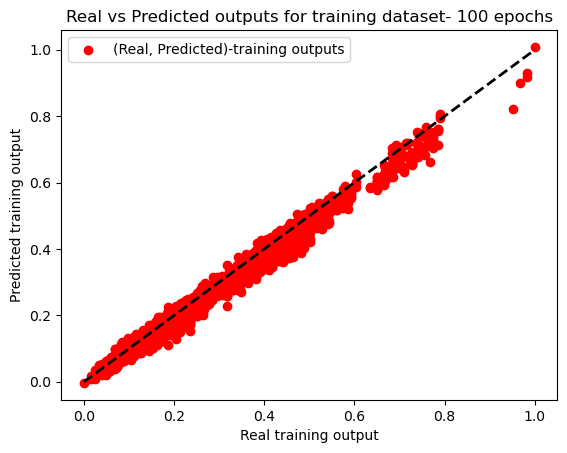

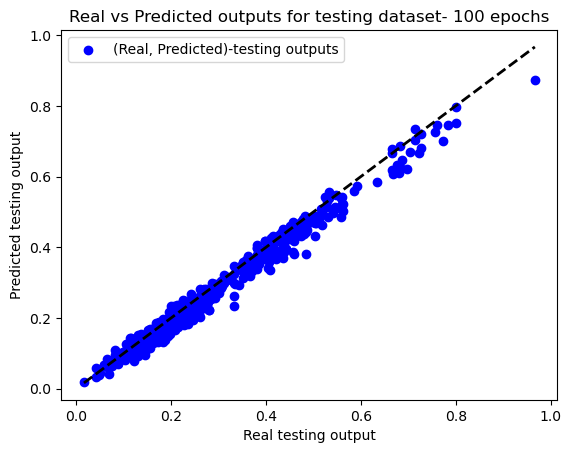

Epoch 1/150
74/74 [==============================] - 1s 3ms/step - loss: 0.0308 - val_loss: 0.0222
Epoch 2/150
74/74 [==============================] - 0s 2ms/step - loss: 0.0209 - val_loss: 0.0190
Epoch 3/150
74/74 [==============================] - 0s 2ms/step - loss: 0.0183 - val_loss: 0.0166
Epoch 4/150
74/74 [==============================] - 0s 2ms/step - loss: 0.0157 - val_loss: 0.0142
Epoch 5/150
74/74 [==============================] - 0s 2ms/step - loss: 0.0136 - val_loss: 0.0138
Epoch 6/150
74/74 [==============================] - 0s 2ms/step - loss: 0.0123 - val_loss: 0.0110
Epoch 7/150
74/74 [==============================] - 0s 2ms/step - loss: 0.0111 - val_loss: 0.0098
Epoch 8/150
74/74 [==============================] - 0s 2ms/step - loss: 0.0101 - val_loss: 0.0096
Epoch 9/150
74/74 [==============================] - 0s 2ms/step - loss: 0.0097 - val_loss: 0.0090
Epoch 10/150
74/74 [==============================] - 0s 2ms/step - loss: 0.0093 - val_loss: 0.0084
Epoch 11/

Epoch 82/150
74/74 [==============================] - 0s 2ms/step - loss: 4.5215e-04 - val_loss: 6.4315e-04
Epoch 83/150
74/74 [==============================] - 0s 2ms/step - loss: 4.6341e-04 - val_loss: 5.6761e-04
Epoch 84/150
74/74 [==============================] - 0s 2ms/step - loss: 4.4297e-04 - val_loss: 5.0684e-04
Epoch 85/150
74/74 [==============================] - 0s 2ms/step - loss: 4.0866e-04 - val_loss: 5.3518e-04
Epoch 86/150
74/74 [==============================] - 0s 2ms/step - loss: 4.2384e-04 - val_loss: 5.8581e-04
Epoch 87/150
74/74 [==============================] - 0s 2ms/step - loss: 4.5758e-04 - val_loss: 4.9444e-04
Epoch 88/150
74/74 [==============================] - 0s 2ms/step - loss: 4.0767e-04 - val_loss: 4.4308e-04
Epoch 89/150
74/74 [==============================] - 0s 2ms/step - loss: 4.5069e-04 - val_loss: 4.3787e-04
Epoch 90/150
74/74 [==============================] - 0s 2ms/step - loss: 3.9370e-04 - val_loss: 4.3184e-04
Epoch 91/150
74/74 [========

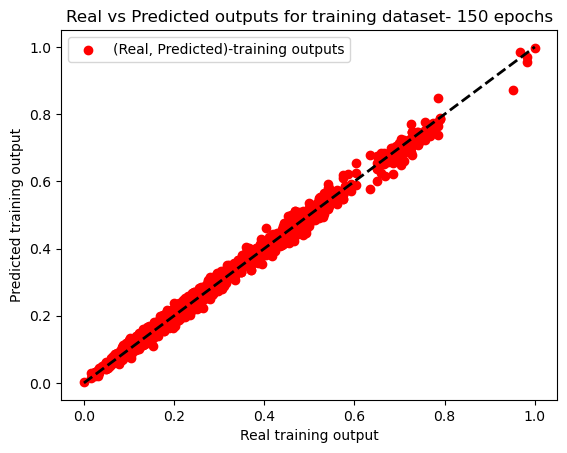

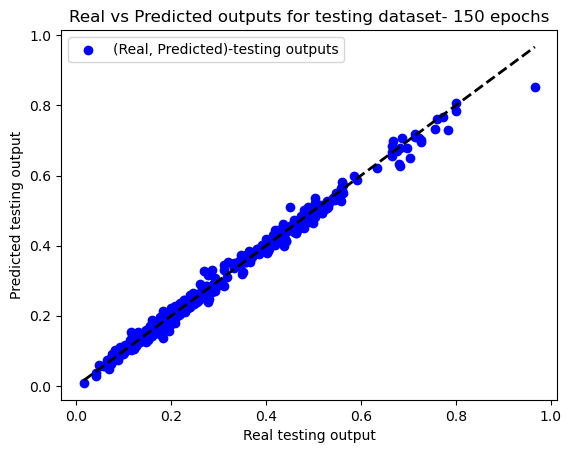

No. of Epochs- 50
MSE for training data- 0.0016200542177509994
R2 for training data- 0.9416698142481006
MSE for testing data- 0.0014960337828472416
R2 for testing data- 0.9452923981890499
No. of Epochs- 100
MSE for training data- 0.0006963660837615935
R2 for training data- 0.9749272817094202
MSE for testing data- 0.0007042431922734572
R2 for testing data- 0.97424693440569
No. of Epochs- 150
MSE for training data- 0.00017846991653055897
R2 for training data- 0.993574175932948
MSE for testing data- 0.000227063328978367
R2 for testing data- 0.991696651285524


In [113]:
# 4. Variations in number of epochs
# Creating lists to store metric values
MSE_train_epochs_result = []
R2_train_epochs_result = []
MSE_test_epochs_result = []
R2_test_epochs_result = []

# Defining the number of epochs in three variations
epochs = [50, 100, 150]

# Creating the model-Model4
for d in epochs:
    model4 = Sequential()
    model4.add(layers.Input(shape=(3,))) 
    ## add hidden layers
    model4.add(layers.Dense(50, activation='relu'))
    model4.add(layers.Dense(25, activation='relu')) ## adjusting the number of hidden nodes
    model4.add(layers.Dense(1, activation='linear')) 
    
    model4.compile(optimizer='adam', loss='mean_squared_error')
    training_history_epochs = model4.fit(m_train, n_train, epochs=d, batch_size=32, validation_data=(m_valid, n_valid))
    
    ## Evaluating on training data
    n_train_predict_epochs = model4.predict(m_train)
    MSE_train_epochs = mean_squared_error(n_train, n_train_predict_epochs)
    R2_train_epochs = r2_score(n_train, n_train_predict_epochs)
    
    ## Evaluating on test data
    n_test_predict_epochs = model4.predict(m_test)
    MSE_test_epochs = mean_squared_error(n_test, n_test_predict_epochs)
    R2_test_epochs = r2_score(n_test, n_test_predict_epochs)
               
    ## Append the metric values to the lists
    MSE_train_epochs_result.append(MSE_train_epochs)
    R2_train_epochs_result.append(R2_train_epochs)
    MSE_test_epochs_result.append(MSE_test_epochs)
    R2_test_epochs_result.append(R2_test_epochs)
    
    ## Plotting and comparing the real vs predicted training outputs
    plt.scatter(n_train, n_train_predict_epochs, c='red', label='(Real, Predicted)-training outputs')
    plt.xlabel('Real training output')
    plt.ylabel('Predicted training output')
    plt.title(f"Real vs Predicted outputs for training dataset- {d} epochs")
    plt.legend()
    plt.plot([min(n_train), max(n_train)], [min(n_train), max(n_train)], 'k--', lw=2) ## Real value = Predicted output line
    plt.savefig(f"Real vs Predicted outputs for training dataset- {d} epochs")
    plt.show()

    
    ## Plotting and comparing the real vs predicted test outputs
    plt.scatter(n_test, n_test_predict_epochs, c='blue', label='(Real, Predicted)-testing outputs')
    plt.xlabel('Real testing output')
    plt.ylabel('Predicted testing output')
    plt.title(f"Real vs Predicted outputs for testing dataset- {d} epochs")
    plt.legend()
    plt.plot([min(n_test), max(n_test)], [min(n_test), max(n_test)], 'k--', lw=2) ## Real value = Predicted output line
    plt.savefig(f"Real vs Predicted outputs for testing dataset- {d} epochs")
    plt.show()

# Displaying the metric results
for r, d in enumerate(epochs):
    print(f"No. of Epochs- {d}")
    print(f"MSE for training data- {MSE_train_epochs_result[r]}")
    print(f"R2 for training data- {R2_train_epochs_result[r]}")
    print(f"MSE for testing data- {MSE_test_epochs_result[r]}")
    print(f"R2 for testing data- {R2_test_epochs_result[r]}")

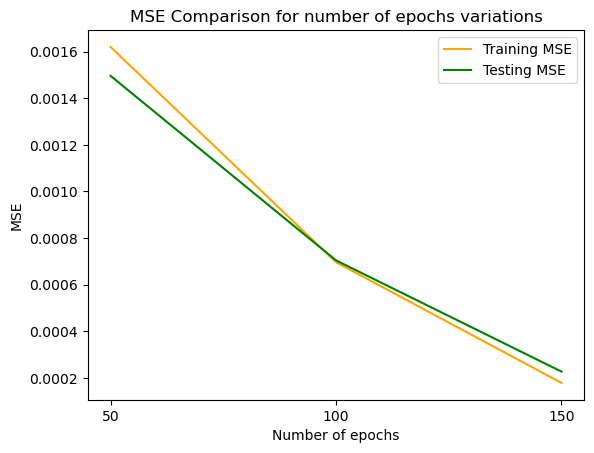

In [114]:
# Plotting MSE Comparison for number of epochs variations for training and testing data
epochs_config = ["50", "100", "150"]
plt.figure()
plt.plot(epochs_config, MSE_train_epochs_result, label='Training MSE', c='Orange')
plt.plot(epochs_config, MSE_test_epochs_result, label='Testing MSE', c='Green')
plt.xlabel('Number of epochs')
plt.ylabel('MSE')
plt.title('MSE Comparison for number of epochs variations')
plt.legend()
plt.savefig('MSE Comparison for number of epochs variations')
plt.show()

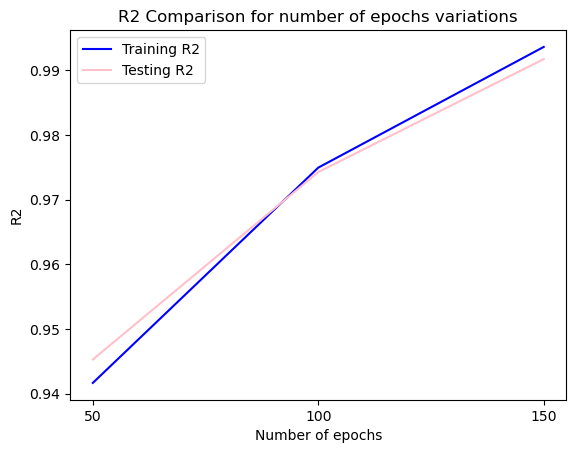

In [115]:
# Plotting R2 Comparison for number of epochs variations for training and testing data
plt.figure()
plt.plot(epochs_config, R2_train_epochs_result, label='Training R2', c='Blue')
plt.plot(epochs_config, R2_test_epochs_result, label='Testing R2', c='Pink')
plt.xlabel('Number of epochs')
plt.ylabel('R2')
plt.title('R2 Comparison for number of epochs variations')
plt.legend()
plt.savefig('R2 Comparison for number of epochs variations')
plt.show()

Epoch 1/80
19/19 [==============================] - 1s 9ms/step - loss: 0.0385 - val_loss: 0.0287
Epoch 2/80
19/19 [==============================] - 0s 4ms/step - loss: 0.0266 - val_loss: 0.0253
Epoch 3/80
19/19 [==============================] - 0s 5ms/step - loss: 0.0239 - val_loss: 0.0230
Epoch 4/80
19/19 [==============================] - 0s 5ms/step - loss: 0.0219 - val_loss: 0.0215
Epoch 5/80
19/19 [==============================] - 0s 4ms/step - loss: 0.0209 - val_loss: 0.0208
Epoch 6/80
19/19 [==============================] - 0s 4ms/step - loss: 0.0205 - val_loss: 0.0197
Epoch 7/80
19/19 [==============================] - 0s 4ms/step - loss: 0.0195 - val_loss: 0.0194
Epoch 8/80
19/19 [==============================] - 0s 4ms/step - loss: 0.0185 - val_loss: 0.0180
Epoch 9/80
19/19 [==============================] - 0s 4ms/step - loss: 0.0178 - val_loss: 0.0174
Epoch 10/80
19/19 [==============================] - 0s 4ms/step - loss: 0.0173 - val_loss: 0.0170
Epoch 11/80
19/19 [

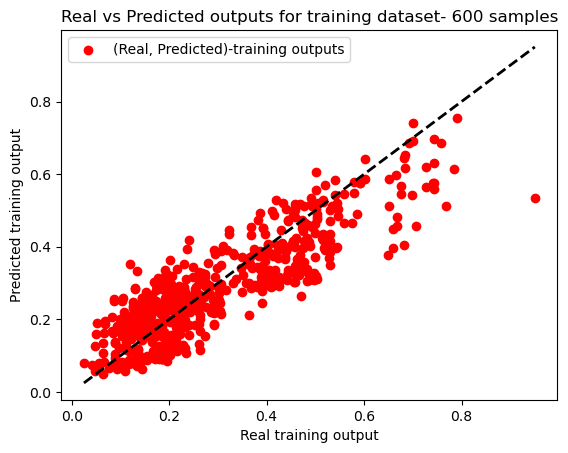

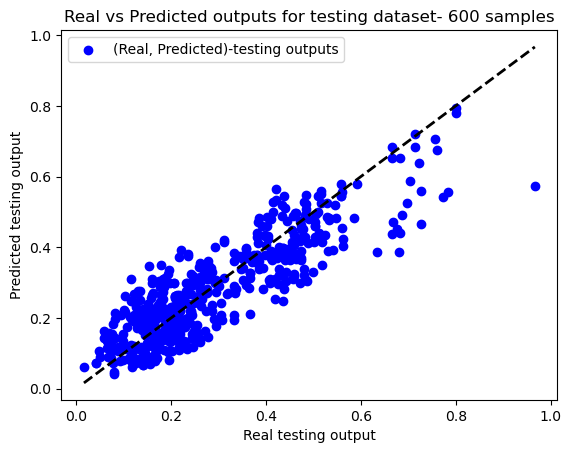

Epoch 1/80
38/38 [==============================] - 1s 5ms/step - loss: 0.0564 - val_loss: 0.0266
Epoch 2/80
38/38 [==============================] - 0s 3ms/step - loss: 0.0246 - val_loss: 0.0224
Epoch 3/80
38/38 [==============================] - 0s 3ms/step - loss: 0.0225 - val_loss: 0.0211
Epoch 4/80
38/38 [==============================] - 0s 3ms/step - loss: 0.0212 - val_loss: 0.0196
Epoch 5/80
38/38 [==============================] - 0s 3ms/step - loss: 0.0198 - val_loss: 0.0179
Epoch 6/80
38/38 [==============================] - 0s 3ms/step - loss: 0.0185 - val_loss: 0.0164
Epoch 7/80
38/38 [==============================] - 0s 3ms/step - loss: 0.0172 - val_loss: 0.0151
Epoch 8/80
38/38 [==============================] - 0s 3ms/step - loss: 0.0159 - val_loss: 0.0139
Epoch 9/80
38/38 [==============================] - 0s 3ms/step - loss: 0.0145 - val_loss: 0.0129
Epoch 10/80
38/38 [==============================] - 0s 3ms/step - loss: 0.0135 - val_loss: 0.0117
Epoch 11/80
38/38 [

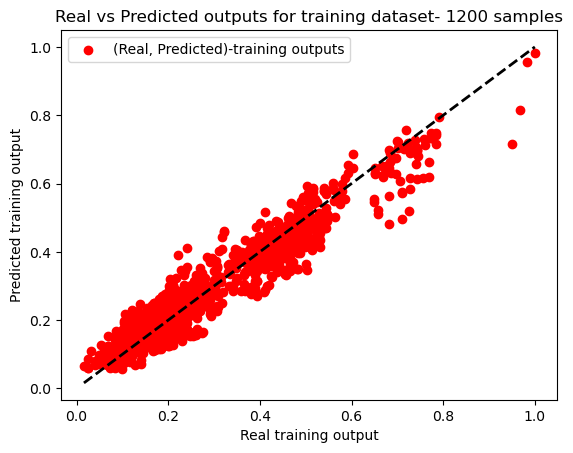

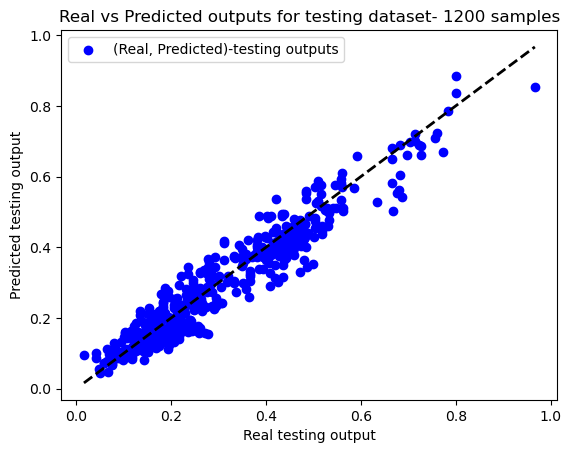

Epoch 1/80
74/74 [==============================] - 1s 3ms/step - loss: 0.0330 - val_loss: 0.0227
Epoch 2/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0217 - val_loss: 0.0207
Epoch 3/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0196 - val_loss: 0.0184
Epoch 4/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0172 - val_loss: 0.0157
Epoch 5/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0150 - val_loss: 0.0134
Epoch 6/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0134 - val_loss: 0.0119
Epoch 7/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0120 - val_loss: 0.0113
Epoch 8/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0111 - val_loss: 0.0104
Epoch 9/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0106 - val_loss: 0.0113
Epoch 10/80
74/74 [==============================] - 0s 2ms/step - loss: 0.0102 - val_loss: 0.0097
Epoch 11/80
74/74 [

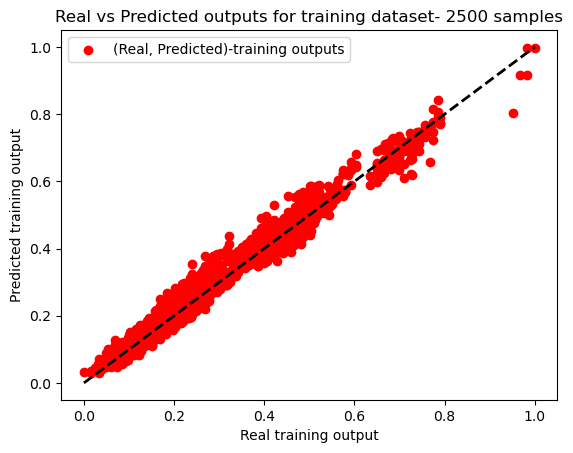

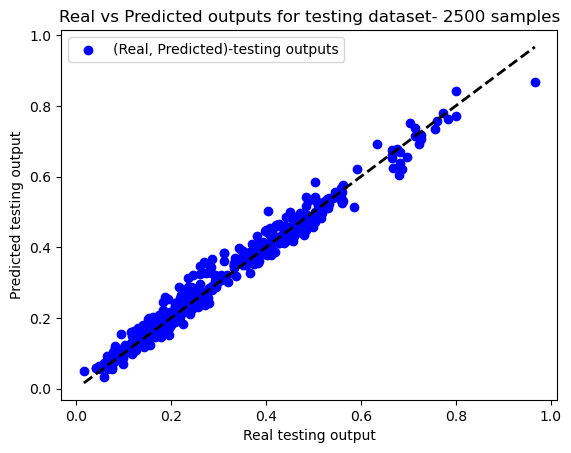

Sample size - 600
MSE for training data- 0.006809230898492827
R2 for training data- 0.7587677414027131
MSE for testing data- 0.006731093215728963
R2 for testing data- 0.7538545107600096
Sample size - 1200
MSE for training data- 0.002502604891841448
R2 for training data- 0.9151484078502806
MSE for testing data- 0.002331036888535657
R2 for testing data- 0.914757648278544
Sample size - 2500
MSE for training data- 0.0006737776813684064
R2 for training data- 0.975740579000953
MSE for testing data- 0.0006559696465864737
R2 for testing data- 0.9760122220253452


In [120]:
# 5. Variations in sample size
# Creating lists to store metric values
MSE_train_sample_result = []
R2_train_sample_result = []
MSE_test_sample_result = []
R2_test_sample_result = []

# Defining the sample sizes in three variations
sample_size = [600, 1200, 2500]

# Creating the model-Model5
for s in sample_size:
    m_train_sample = m_train[:s]
    n_train_sample = n_train[:s]
    model5 = Sequential()
    model5.add(layers.Input(shape=(3,))) 
    ## add hidden layers
    model5.add(layers.Dense(50, activation='relu'))
    model5.add(layers.Dense(30, activation='relu')) ## adjusting the number of hidden nodes
    model5.add(layers.Dense(1, activation='linear')) 
    
    model5.compile(optimizer='adam', loss='mean_squared_error')
    training_history_sample = model5.fit(m_train_sample, n_train_sample, epochs=80, batch_size=32, validation_data=(m_valid, n_valid))
    
    ## Evaluating on training data
    n_train_predict_sample = model5.predict(m_train_sample)
    MSE_train_sample = mean_squared_error(n_train_sample, n_train_predict_sample)
    R2_train_sample = r2_score(n_train_sample, n_train_predict_sample)
    
    ## Evaluating on test data
    n_test_predict_sample = model5.predict(m_test)
    MSE_test_sample = mean_squared_error(n_test, n_test_predict_sample)
    R2_test_sample = r2_score(n_test, n_test_predict_sample)
               
    ## Append the metric values to the lists
    MSE_train_sample_result.append(MSE_train_sample)
    R2_train_sample_result.append(R2_train_sample)
    MSE_test_sample_result.append(MSE_test_sample)
    R2_test_sample_result.append(R2_test_sample)
    
    ## Plotting and comparing the real vs predicted training outputs
    plt.scatter(n_train_sample, n_train_predict_sample, c='red', label='(Real, Predicted)-training outputs')
    plt.xlabel('Real training output')
    plt.ylabel('Predicted training output')
    plt.title(f"Real vs Predicted outputs for training dataset- {s} samples")
    plt.legend()
    plt.plot([min(n_train_sample), max(n_train_sample)], [min(n_train_sample), max(n_train_sample)], 'k--', lw=2) ## Real value = Predicted output line
    plt.savefig(f"Real vs Predicted outputs for training dataset- {s} samples")
    plt.show()

    
    ## Plotting and comparing the real vs predicted test outputs
    plt.scatter(n_test, n_test_predict_sample, c='blue', label='(Real, Predicted)-testing outputs')
    plt.xlabel('Real testing output')
    plt.ylabel('Predicted testing output')
    plt.title(f"Real vs Predicted outputs for testing dataset- {s} samples")
    plt.legend()
    plt.plot([min(n_test), max(n_test)], [min(n_test), max(n_test)], 'k--', lw=2) ## Real value = Predicted output line
    plt.savefig(f"Real vs Predicted outputs for testing dataset- {s} samples")
    plt.show()

# Displaying the metric results
for w, s in enumerate(sample_size):
    print(f"Sample size - {s}")
    print(f"MSE for training data- {MSE_train_sample_result[w]}")
    print(f"R2 for training data- {R2_train_sample_result[w]}")
    print(f"MSE for testing data- {MSE_test_sample_result[w]}")
    print(f"R2 for testing data- {R2_test_sample_result[w]}")

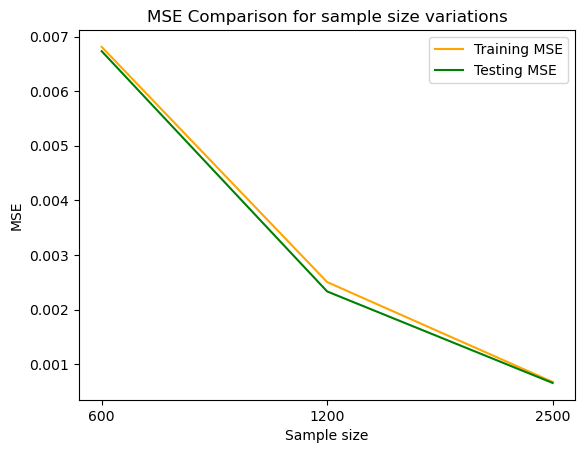

In [121]:
# Plotting MSE Comparison for number of sample size variations for training and testing data
sample_config = ["600", "1200", "2500"]
plt.figure()
plt.plot(sample_config, MSE_train_sample_result, label='Training MSE', c='Orange')
plt.plot(sample_config, MSE_test_sample_result, label='Testing MSE', c='Green')
plt.xlabel('Sample size')
plt.ylabel('MSE')
plt.title('MSE Comparison for sample size variations')
plt.legend()
plt.savefig('MSE Comparison for sample size variations')
plt.show()

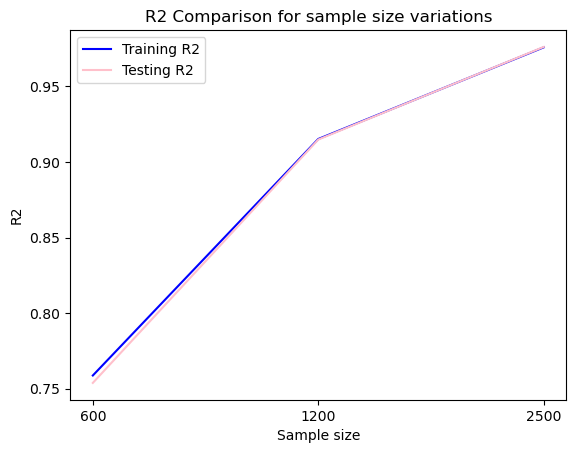

In [122]:
# Plotting R2 Comparison for number of sample size variations for training and testing data
plt.figure()
plt.plot(sample_config, R2_train_sample_result, label='Training R2', c='Blue')
plt.plot(sample_config, R2_test_sample_result, label='Testing R2', c='Pink')
plt.xlabel('Sample size')
plt.ylabel('R2')
plt.title('R2 Comparison for sample size variations')
plt.legend()
plt.savefig('R2 Comparison for sample size variations')
plt.show()